In [35]:
# Basic Lib
import numpy as np
import pandas as pd

# visulaization lib
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# #Deep Learning module
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier


In [36]:
# load the dataset
(X_train_digit,Y_train_digit),(X_test_digit,Y_test_digit) = mnist.load_data()

In [37]:
X_train_digit[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
Y_train_digit[1]

0

In [39]:
Y_test_digit[1]

2

<function matplotlib.pyplot.show(close=None, block=None)>

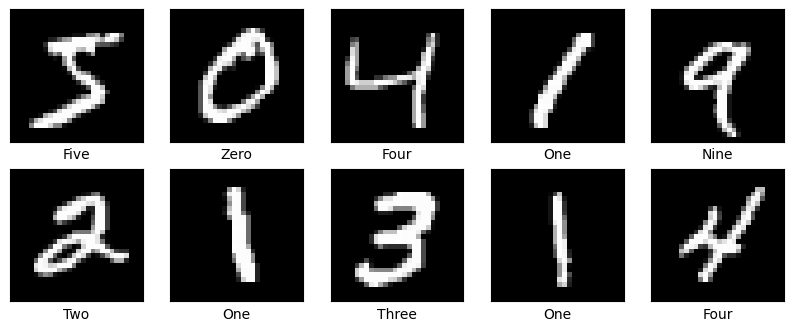

In [40]:
# to see the images
#name the numbers in dataset 
col_names  = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visualizing the digits

plt.figure(figsize =(10,10)) # to show the size of image l*b
for i in range(10): # range of 10 data 
    plt.subplot(5,5,i+1) # 5,5 show the number of rows and columns to displlay by image, i = 0,1,2,--10 +1 is to increase
    plt.xticks([]) # xaxis
    plt.yticks([]) # y axis
    plt.imshow(X_train_digit[i],cmap ='gray') # to show the training input, cmap to visualize
    plt.xlabel(col_names[Y_train_digit[i]]) # to check the training output
plt.show

In [41]:
X_train_digit.shape

(60000, 28, 28)

ANN accepts 2D input, here 3 inputs are there.

60000 - count of training data
28,28 - rows , columns

So, need to convert it as 2D input by multiply the r*c - 784.

Here did .reshape to change the size

In [42]:
X_train_digit= X_train_digit.reshape(60000,784)
X_test_digit= X_test_digit.reshape(10000,784)

In [71]:
X_test_digit.shape

(10000, 784)

In [44]:
Y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
# need to check the shape of ouput
Y_test_digit.shape # it return 1 d so ann output should be in one hot encoding technique

(10000,)

In [46]:
Y_train_digit = to_categorical(Y_train_digit, num_classes = 10)# here to categorical is to calssify the 0 to 9 numbers in 10 classes num class shows the number of classes
Y_test_digit = to_categorical(Y_test_digit, num_classes = 10)

In [72]:
Y_test_digit.shape

(10000, 10)

In [48]:
Y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
# model creation
model =keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# param = outputchannel * (input +1)
# param = 256* (784+1) = 200960
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# compiling model 
model.compile(loss ='categorical_crossentropy',  # loss func
             optimizer ='adam', # optimizer all are hyper paramater based on the needs can able to change refer keras.complie page
             metrics = ['accuracy'])

In [52]:
history = model.fit(X_train_digit, Y_train_digit, batch_size = 50, epochs = 10, validation_data =(X_test_digit,Y_test_digit))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7919 - loss: 2.7223 - val_accuracy: 0.9235 - val_loss: 0.2891
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9360 - loss: 0.2404 - val_accuracy: 0.9367 - val_loss: 0.2544
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9544 - loss: 0.1666 - val_accuracy: 0.9509 - val_loss: 0.2029
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9597 - loss: 0.1431 - val_accuracy: 0.9519 - val_loss: 0.1819
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9647 - loss: 0.1248 - val_accuracy: 0.9523 - val_loss: 0.1881
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9703 - loss: 0.1099 - val_accuracy: 0.9639 - val_loss: 0.1538
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9735 - loss: 0.0954 - val_accuracy: 0.9665 - val_loss: 0.1281
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9763 - loss: 0.0812 - 

In [53]:
# predit the output
test_pred = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
test_pred

array([[8.9962063e-03, 9.9996781e-01, 9.9999791e-01, ..., 1.0000000e+00,
        9.9999177e-01, 9.9999541e-01],
       [7.2678440e-06, 5.6284392e-01, 9.9999988e-01, ..., 5.0276452e-01,
        2.8419748e-03, 1.9395781e-10],
       [1.8927844e-03, 9.9999869e-01, 8.8007063e-01, ..., 5.5251632e-02,
        9.0588313e-01, 2.8370394e-04],
       ...,
       [1.3679886e-02, 1.7333834e-01, 8.7361157e-02, ..., 9.3951780e-01,
        9.9999797e-01, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [9.8937434e-01, 2.0233055e-03, 4.6360746e-01, ..., 4.2973724e-07,
        9.1528302e-01, 2.6653390e-02]], dtype=float32)

In [55]:
test_pred = np.argmax(test_pred,axis =1) # to change the preprocessed one hot encoding to actual data
test_pred # for predicted value

array([7, 2, 1, ..., 4, 0, 6], dtype=int64)

In [56]:
Y_test_digit_eval = np.argmax(Y_test_digit,axis =1) # same for test data output 
Y_test_digit_eval # actual value

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\kathi\AppData\Local\Temp\ipykernel_18620\2294490568.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


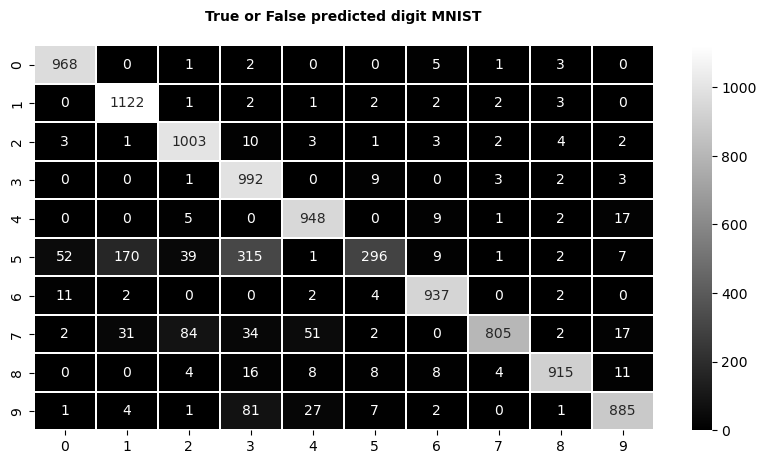

In [57]:
# confusion matrox
con_mat = confusion_matrix(Y_test_digit_eval, test_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize =(10,5))
sns.heatmap(con_mat,annot =True,annot_kws ={'size':10},linewidth=0.3,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight ='bold',fontsize =10)
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_digit_eval,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.84      0.99      0.91      1135
           2       0.88      0.97      0.92      1032
           3       0.68      0.98      0.81      1010
           4       0.91      0.97      0.94       982
           5       0.90      0.33      0.48       892
           6       0.96      0.98      0.97       958
           7       0.98      0.78      0.87      1028
           8       0.98      0.94      0.96       974
           9       0.94      0.88      0.91      1009

    accuracy                           0.89     10000
   macro avg       0.90      0.88      0.87     10000
weighted avg       0.90      0.89      0.88     10000



In [59]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


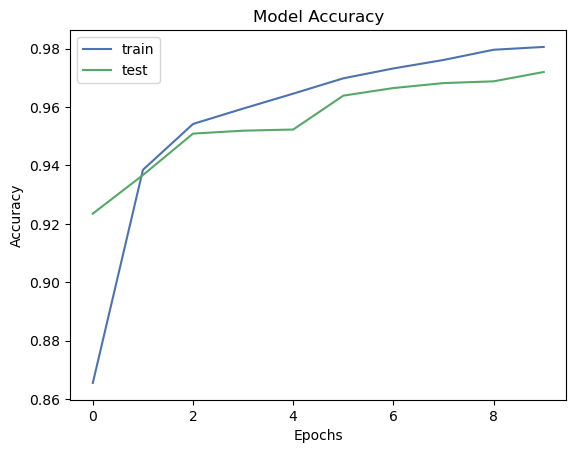

In [60]:
# summarization of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

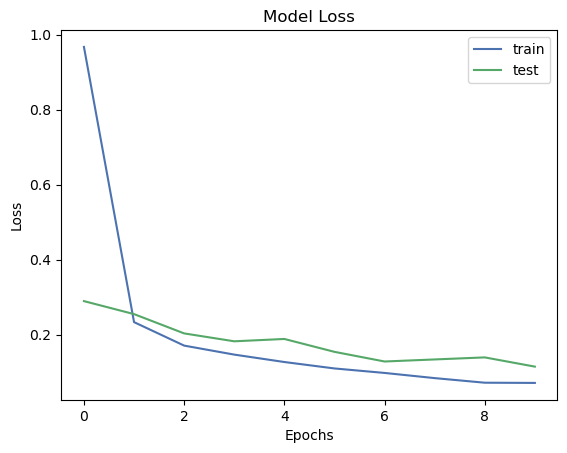

In [73]:
# summarization the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

In [68]:
test_pred_single = model.predict(X_test_digit[[2]])
test_pred_single = np.argmax(test_pred_single,axis =1)
print(test_pred_single)
# Y_test_digit_eval = np.argmax(Y_test_digit,axis =1 )
# print(Y_test_digit_eval)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[1]


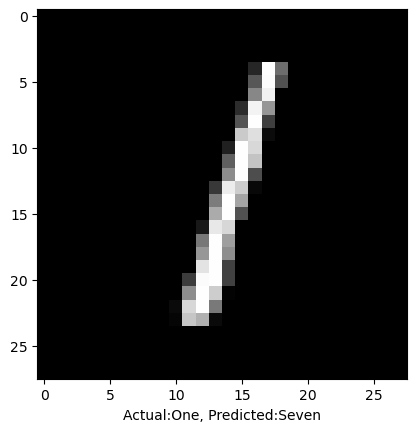

In [79]:
col_names  = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

plt.imshow(X_test_digit[2].reshape(28,28),cmap ='gray')
plt.xlabel("Actual:{}, Predicted:{}".format(col_names[np.argmax(Y_test_digit[2])],col_names[test_pred[0]]))
plt.show()

In [30]:
# pip install scikeras

In [31]:
# pip install tensorflow scikeras scikit-learn

In [32]:
# pip install tensorflow

In [33]:
# pip install keras

In [34]:
# pip install --upgrade tensorflow keras